In [22]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
%config InlineBackend.figure_format = 'svg' # Makes the images look nice
from qiskit_textbook.widgets import scalable_circuit

In [47]:
def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation: 
        circuit.cu1(pi/2**(n-qubit), qubit, n)

In [48]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit


In [49]:
scalable_circuit(qft)

/home/tlo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  if __name__ == '__main__':


IntSlider(value=4, max=8, min=1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02t\x00\x00\x01\x08\x08\x06\x00\x00\x00\xd6ai\xe8\x…

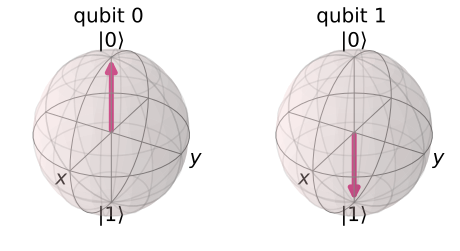

In [53]:
#Let's create the registers for 2 qubits
qc = QuantumCircuit(2)

#Prepare state |01>
qc.x(1)

#Plot Bloch vectors
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

/home/tlo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  if __name__ == '__main__':


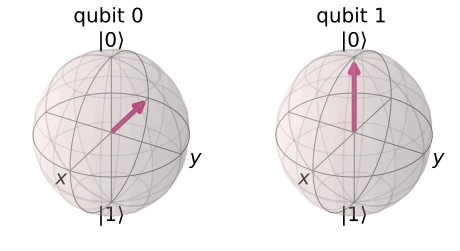

In [54]:
#Perform QFT
qft(qc,2)

#Plot the Bloch vectors
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)
#The vectors don't match with the Fourier vectors... Doesn't seem to work

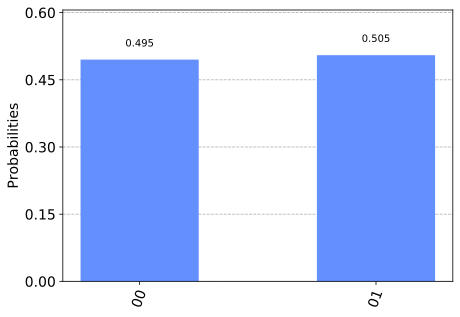

In [55]:
#Let's do measurements
qc.measure_all()
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)
#fifty-fifty result between 00 and 01... No good

/home/tlo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  import sys
/home/tlo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  


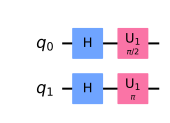

In [56]:
#Prepare Fourier state ~1
nqubits = 2
number = 1
qc2 = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc2.h(qubit)
qc2.u1(number*pi/2,0)
qc2.u1(number*pi,1)


qc2.draw('mpl')

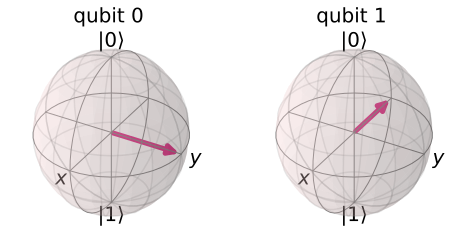

In [57]:
#Plot the Bloch vectors of 
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc2, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

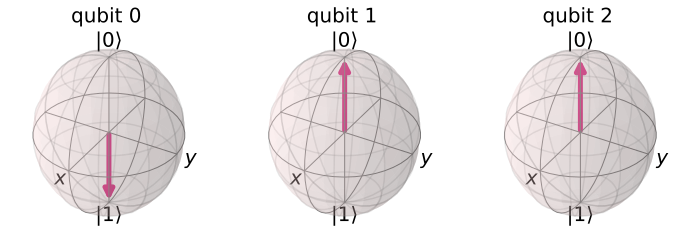

In [58]:
#Let's try with 3 qubits
qc = QuantumCircuit(3)

#Prepare state |01>
qc.x(0)

#Plot Bloch vectors
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

/home/tlo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  if __name__ == '__main__':


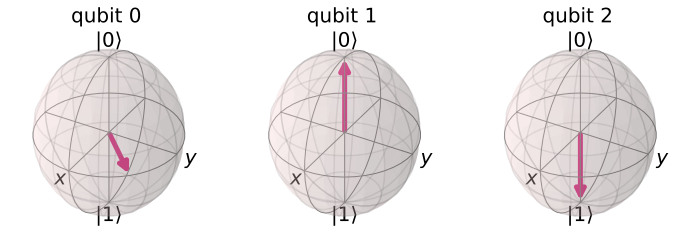

In [59]:
#Perform QFT
qft(qc,3)

#Plot the Bloch vectors
backend = Aer.get_backend("statevector_simulator")
statevector = execute(qc, backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)

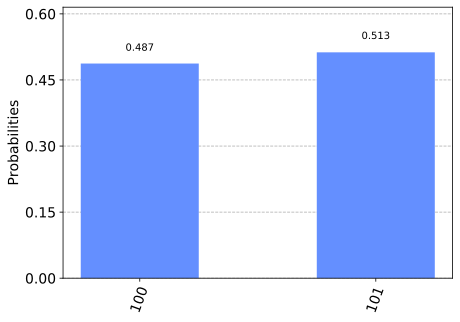

In [60]:
#Let's do measurements
qc.measure_all()
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)
#Again fifty fifty result between two choises